# Ermittlung der Fahrqualität von Fahrradwegen mit Fuzzy Logik

## Thema

Mit Fuzzy Logik soll die Oberflächenqualität von Fahrradwegen eingeordnet werden nach dem Kriterium der Fahrqualität. Hierfür werden unterschiedliche Regeln und Merkmale der erfassten Daten untersucht. Im Gegensatz zu klassischen Logik gibt es nicht nur Wahrheitswerte 0 für falsch oder 1 für wahr, sondern es gibt Wahrheitswerte zwischen 0 und 1. Damit ist es möglich auszudrücken, dass etwas zum Teil wahr oder falsch ist.  Der Vorteil bei der Verwendung von Fuzzy Logik gegenüber Clustering Verfahren wie KMeans ist es menschliches Kausalwissen oder Verhaltensweisen zu mathematisieren. Ein Eingangswert x kann mit einem Zugehörigkeitsgrad q einem linguistischen Wert LW zugeordnet werden.

## Versuchsbeschreibung

In dem Versuchen wird die Bibliothek [Scikit Fuzzy (skfuzzy)](https://pythonhosted.org/scikit-fuzzy/) genutzt.

### Versuch 1
In diesem Versuch wird für das Merkmal Standardabweichung der Z-Achsen Beschleunigung in m/s^2 der Datensätze 15 bis 22 als Eingangsgröße für das Fuzzy System gewählt. Es gibt zwei linguistische Werte der Ausgangsgröße „gut“ oder „schlecht“ im Sinne der Fahrqualität des Fahrradwegen. 


In [86]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

vibration = ctrl.Antecedent(np.arange(0, 30, 1), 'Standardabweichung Beschleunigung der Z-Achse in m/s^2')
qualityWay = ctrl.Consequent(np.arange(0, 11, 1), 'Fahrqualität')
 
vibration['hoch'] = fuzz.trimf(vibration.universe, [0, 30, 30])
vibration['niedrig'] = fuzz.trimf(vibration.universe, [0, 0, 30])

qualityWay['schlecht'] = fuzz.trimf(qualityWay.universe, [0, 0, 10])
qualityWay['gut'] = fuzz.trimf(qualityWay.universe, [0, 10, 10])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


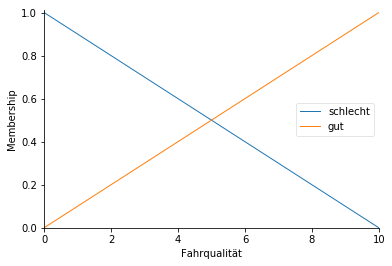

In [87]:
qualityWay.view()

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


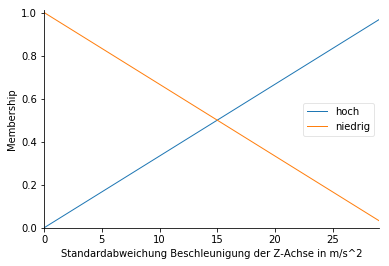

In [88]:
vibration.view()

In [95]:
rule1 = ctrl.Rule(vibration['hoch'], qualityWay['schlecht'])
rule2 = ctrl.Rule(vibration['niedrig'], qualityWay['gut'])

In [96]:
way_ctrl = ctrl.ControlSystem([rule1,rule2])

In [97]:
wayQ = ctrl.ControlSystemSimulation(way_ctrl)

In [104]:
wayQ.input['Standardabweichung Beschleunigung der Z-Achse in m/s^2'] = 15
wayQ.compute()

5.0


C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


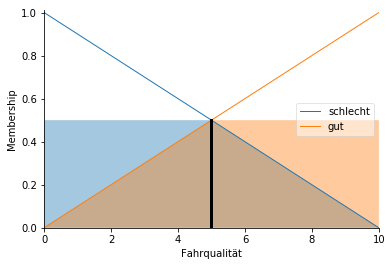

In [105]:
print(wayQ.output['Fahrqualität'])
qualityWay.view(sim=wayQ)